# Imports

In [2]:
! git clone -b Word-Embedding https://github.com/OmdenaAI/Arabic-Chapter/

fatal: destination path 'Arabic-Chapter' already exists and is not an empty directory.


In [3]:
% cd /content/Arabic-Chapter/

/content/Arabic-Chapter


# Main

## Neural Nets

In [3]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

from utils import helper, preprocess
from utils.config import config
from models.Word2Vec import Word2Vec

In [4]:
train_pos = pd.read_csv("data/train_Arabic_tweets_positive_20190413.tsv", sep='\t', names=["label", "tweet"])
train_neg = pd.read_csv("data/train_Arabic_tweets_negative_20190413.tsv", sep='\t', names=["label", "tweet"])
test_pos = pd.read_csv("data/test_Arabic_tweets_positive_20190413.tsv", sep='\t', names=["label", "tweet"])
test_neg = pd.read_csv("data/test_Arabic_tweets_negative_20190413.tsv", sep='\t', names=["label", "tweet"])
train = pd.concat([train_pos, train_neg])#.sample(frac=1, random_state=0)
test = pd.concat([test_pos, test_neg])

In [5]:
text = list(train.tweet)
label = list(train.label)

#Keras Neural net features
embeddings = Word2Vec(preprocess.tokenizer, vocab_size=config['vocab_size'], maxlen=config['maxlen'], embedding_vector=config['embedding_vector'], method=config['method'])
text = embeddings.tokenize(text, stop_words=config['stop_words'], punctuations=config['punctuations'])
text, label, unique_words, word_dict = embeddings.encode(text, label)
text, label = np.array(text), np.array(label)


100%|██████████| 45275/45275 [00:03<00:00, 12174.88it/s]


Epoch 1/20
1132/1132 [==============================] - 30s 23ms/step - loss: 0.6606 - accuracy: 0.6283 - val_loss: 0.9676 - val_accuracy: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.96764, saving model to models/word_embeddings_NN.h5
Epoch 2/20
1132/1132 [==============================] - 25s 22ms/step - loss: 0.6590 - accuracy: 0.6284 - val_loss: 1.0092 - val_accuracy: 0.0000e+00

Epoch 00002: val_loss did not improve from 0.96764
Epoch 3/20
1132/1132 [==============================] - 24s 22ms/step - loss: 0.6576 - accuracy: 0.6284 - val_loss: 0.9853 - val_accuracy: 0.0000e+00

Epoch 00003: val_loss did not improve from 0.96764
Epoch 4/20
1132/1132 [==============================] - 24s 22ms/step - loss: 0.6550 - accuracy: 0.6284 - val_loss: 0.9923 - val_accuracy: 0.0000e+00

Epoch 00004: val_loss did not improve from 0.96764
Epoch 5/20
1132/1132 [==============================] - 24s 22ms/step - loss: 0.6501 - accuracy: 0.6284 - val_loss: 0.9553 - val_accuracy: 0.0000e

In [ ]:
model = embeddings.train_keras(text=text, label=label, epochs=config['epochs'], validation_split=config['test_size'])

In [12]:
word_embeddings = model.get_layer("embedding").get_weights()[0]
word_embeddings[0]

array([-0.0096106 ,  0.03305908, -0.02835516,  0.03725642,  0.07237826,
        0.03352902, -0.06692044,  0.1076899 ,  0.14881808, -0.0720993 ,
        0.06620847,  0.04270552, -0.00979008, -0.03189142, -0.03209103,
        0.00666018,  0.01647544,  0.0540922 , -0.06741755, -0.04468779,
       -0.04223862,  0.01178254,  0.05260447,  0.07448044,  0.04204837,
       -0.12512347,  0.04988005, -0.04347748, -0.05666597, -0.05425873,
        0.07730792, -0.08430462,  0.11486478, -0.11339506, -0.09214076,
        0.01517092,  0.06165873, -0.12934233,  0.04064712, -0.01449664,
       -0.05350719,  0.00784005, -0.10695789, -0.0434512 ,  0.06571231,
       -0.17378618,  0.05577042,  0.0777794 ,  0.04125278, -0.00528057],
      dtype=float32)

In [13]:
embeddings = helper.get_embeddings(unique_words, word_dict, word_embeddings, len(unique_words))

In [15]:
embeddings['مدينة']

array([-0.02707701,  0.03722898, -0.02394028,  0.01537044, -0.01987288,
       -0.01512546,  0.02277893, -0.0012152 ,  0.02761947,  0.0159828 ,
        0.02079432, -0.04713788,  0.03402409, -0.00768286,  0.04432173,
       -0.0385219 , -0.03012923,  0.0296484 , -0.02949761, -0.00445793,
       -0.01991098, -0.00495299, -0.01034752,  0.02859915,  0.02925693,
       -0.03770174,  0.02620887, -0.02215844,  0.01638568,  0.02204752,
        0.00940879,  0.00537003, -0.02069404, -0.00958155,  0.02648169,
        0.04396056,  0.04369683,  0.02344037, -0.04868635, -0.04545708,
        0.0399685 , -0.00140494,  0.03639134,  0.03756477, -0.01693914,
       -0.00197585, -0.02662023, -0.04910902, -0.03725194, -0.00563649],
      dtype=float32)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128155 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128285 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128171 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127872 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128285 missing from current font.
  font.

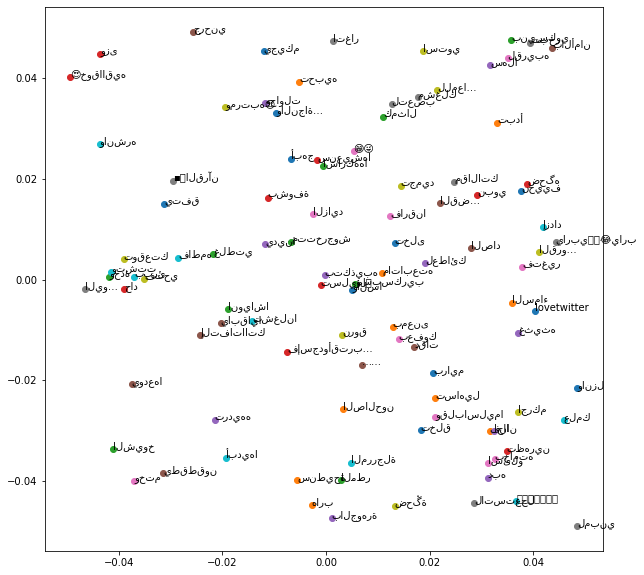

In [9]:
helper.plot(word_dict, embeddings, "embeddings_NN") 
helper.save_embeddings(embeddings, "embeddings_NN")

In [17]:
def vec_sim(word, top_n):
    v_w1 = embeddings[word]
    word_sim = {}

    for i in tqdm(unique_words, total=len(unique_words)):
      # Find the similary score for each word in vocab
      v_w2 = embeddings[i]
      theta_sum = np.dot(v_w1, v_w2)
      theta_den = np.linalg.norm(v_w1) * np.linalg.norm(v_w2)
      theta = theta_sum / theta_den

      word_sim[i] = theta

    words_sorted = sorted(word_sim.items(), key=lambda kv: kv[1], reverse=True)

    for word, sim in words_sorted[:top_n]:
      print(word, sim)

# Find similar words
vec_sim("مدينة", 3)


مدينة 1.0
فوقي 0.61554587
ومابقي 0.57996714


## Word2Vec - CBOW

In [14]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tqdm.notebook import tqdm

from utils import helper, preprocess
from utils.config import config
from models.Word2Vec import Word2Vec

In [5]:
train_pos = pd.read_csv("data/train_Arabic_tweets_positive_20190413.tsv", sep='\t', names=["label", "tweet"])
train_neg = pd.read_csv("data/train_Arabic_tweets_negative_20190413.tsv", sep='\t', names=["label", "tweet"])
test_pos = pd.read_csv("data/test_Arabic_tweets_positive_20190413.tsv", sep='\t', names=["label", "tweet"])
test_neg = pd.read_csv("data/test_Arabic_tweets_negative_20190413.tsv", sep='\t', names=["label", "tweet"])
train = pd.concat([train_pos, train_neg])#.sample(frac=1, random_state=0)
test = pd.concat([test_pos, test_neg])

In [6]:
text = list(train.tweet)[:10000]

# Word2vec
embeddings = Word2Vec(preprocess.tokenizer, vocab_size=config['vocab_size'], maxlen=config['maxlen'], embedding_vector=config['embedding_vector'], method=config['method'])
text = embeddings.tokenize(text, stop_words=config['stop_words'], punctuations=config['punctuations'])
# print(text[0])
# print("\n")
words, label, unique_words, word_dict = embeddings.encode_w2v(text, window_size=config['window_size'])
words, label = np.array(words), np.array(label)

100%|██████████| 196673/196673 [00:00<00:00, 266909.11it/s]


In [6]:
text[0]

['نحن',
 'الذين',
 'يتحول',
 'كل',
 'نود',
 'أن',
 'نقوله',
 'دعاء',
 'لله',
 'لا',
 'تبحثوا',
 'فينا',
 'عن',
 'قوة',
 'إننا',
 'مكسورون',
 'القوة',
 'التي…']

In [7]:
words[0], label[0]

(array([28676,  9311]), array([21753]))

In [8]:
model = embeddings.train_w2v(words, label, epochs=config['epochs'], validation_split=config['test_size'])

Epoch 1/20
4917/4917 [==============================] - 111s 22ms/step - loss: 11.7343 - accuracy: 0.0145 - val_loss: 11.7090 - val_accuracy: 0.0152

Epoch 00001: val_loss improved from inf to 11.70903, saving model to models/word_embeddings_w2v.h5
Epoch 2/20
4917/4917 [==============================] - 111s 23ms/step - loss: 11.6814 - accuracy: 0.0146 - val_loss: 11.6480 - val_accuracy: 0.0152

Epoch 00002: val_loss improved from 11.70903 to 11.64800, saving model to models/word_embeddings_w2v.h5
Epoch 3/20
4917/4917 [==============================] - 110s 22ms/step - loss: 11.1725 - accuracy: 0.0143 - val_loss: 10.0564 - val_accuracy: 0.0132

Epoch 00003: val_loss improved from 11.64800 to 10.05637, saving model to models/word_embeddings_w2v.h5
Epoch 4/20
4917/4917 [==============================] - 109s 22ms/step - loss: 9.4791 - accuracy: 0.0132 - val_loss: 9.4484 - val_accuracy: 0.0046

Epoch 00004: val_loss improved from 10.05637 to 9.44836, saving model to models/word_embeddings

In [7]:
model = tf.keras.models.load_model("/content/Arabic-Chapter/models/word_embeddings_w2v.h5")

In [8]:
word_embeddings = model.get_layer("embedding").get_weights()[0]
word_embeddings[0]

array([ 0.01435949, -0.01956448,  0.00986885, -0.01632073, -0.01117974,
       -0.03691963, -0.01136785, -0.02029503,  0.02082002, -0.01652777,
       -0.04442152,  0.02235116, -0.00252982,  0.01491512,  0.04353438,
       -0.04495598, -0.01809297, -0.01153   ,  0.04156549, -0.02113437,
       -0.00397139,  0.00414608,  0.00125252,  0.04027688, -0.03642813,
       -0.00293092, -0.01914087, -0.03686436, -0.00929801, -0.02537062,
       -0.04860413,  0.01841185, -0.03112571,  0.01866894, -0.0277565 ,
        0.03703723, -0.03375514,  0.04962576,  0.03345209, -0.00834049,
       -0.00684296, -0.01872794, -0.0320138 ,  0.00185501, -0.04259627,
        0.03705073, -0.00109315,  0.04938721,  0.03736651, -0.01264704],
      dtype=float32)

In [9]:
embeddings = helper.get_embeddings(unique_words, word_dict, word_embeddings, len(unique_words))

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 1757 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 1757 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128064 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128071 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 127995 missing from current font.
  font.set_te

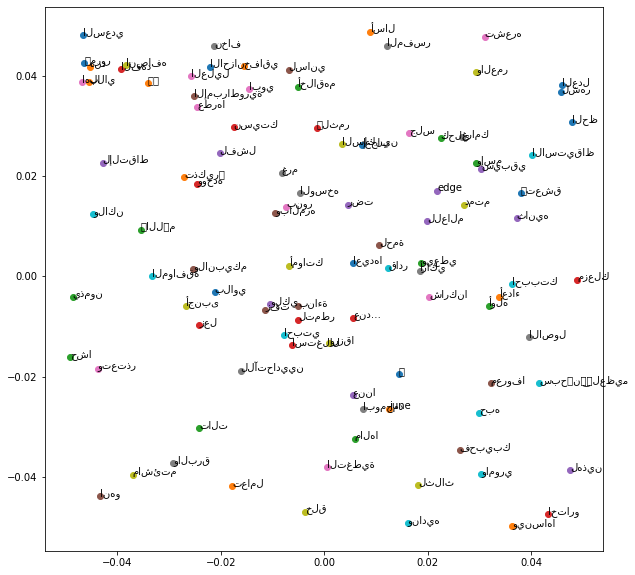

In [10]:
helper.plot(word_dict, embeddings, "embeddings_w2v")
helper.save_embeddings(embeddings, "embeddings_w2v") 

In [15]:
def vec_sim(word, top_n):
    v_w1 = embeddings[word]
    word_sim = {}

    for i in tqdm(unique_words, total=len(unique_words)):
      # Find the similary score for each word in vocab
      v_w2 = embeddings[i]
      theta_sum = np.dot(v_w1, v_w2)
      theta_den = np.linalg.norm(v_w1) * np.linalg.norm(v_w2)
      theta = theta_sum / theta_den

      word_sim[i] = theta

    words_sorted = sorted(word_sim.items(), key=lambda kv: kv[1], reverse=True)

    for word, sim in words_sorted[:top_n]:
      print(word, sim)

# Find similar words
vec_sim("مدينة", 3)


مدينة 1.0
بمقطع 0.5957887
بلاك 0.5195513
